<a href="https://colab.research.google.com/github/AndBalbino/TechChallengerFiap_EconomicosAnalise/blob/main/AnaliseDadosEconomicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pergunta-guia central da análise
Em quais países faz mais sentido investir esforços de exportação de vinho brasileiro e afins, considerando o cenário econômio?


## Perguntas norteadoras
- Quais países tem o maior PIB?
- Quais países tem as maiores e menores infleções?
- Quais países mais cresceram nos últimos anos?
- Quais paises tem o maior e o menor poder de compra por individuo, considerando a inflação?
- Quais países tem os melhores pib per capita?
- Dos paises com os maiores pibs, qual deles mais tem crescido nos ultimos anos?
- Quais países combinam renda alta (PIB per capita) e crescimento positivo?
- Quais mercados ficaram mais “baratos” ou “caros” para importar vinho brasileiro em 2024 (câmbio)?
- A inflação elevada está concentrada em algum grupo de países relevantes?

In [143]:
# Importação de LIBS para análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_economiaPaises = pd.read_csv('/content/DadosEconomicos_Organizados.csv')
df_economiaPaises.head()

,pais,ano,codigo_pais,pib_usd_corrente,pib_per_capita_usd,crescimento_pib_anual,inflacao_anual,taxa_cambio_local_usd,renda_bruta_per_capita_usd
0,Afghanistan,2009,AFG,1.241615e+10,452.05,21.39,-6.81,50.32,460.0
1,Afghanistan,2010,AFG,1.585667e+10,560.62,14.36,2.18,46.45,530.0
2,Afghanistan,2011,AFG,1.780510e+10,606.69,0.43,11.80,46.75,550.0
3,Afghanistan,2012,AFG,1.990733e+10,651.42,12.75,6.44,50.92,640.0
4,Afghanistan,2013,AFG,2.014642e+10,637.09,5.60,7.39,55.38,670.0


In [144]:
df_economiaPaises.info()
df_economiaPaises.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pais                        3472 non-null   object 
 1   ano                         3472 non-null   int64  
 2   codigo_pais                 3472 non-null   object 
 3   pib_usd_corrente            3424 non-null   float64
 4   pib_per_capita_usd          3424 non-null   float64
 5   crescimento_pib_anual       3424 non-null   float64
 6   inflacao_anual              3072 non-null   float64
 7   taxa_cambio_local_usd       3392 non-null   float64
 8   renda_bruta_per_capita_usd  3296 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 244.3+ KB


(3472, 9)

In [145]:
# Lista de exclusão dos países futuramente
paises_para_excluir = ['Albania', 'American Samoa', 'Andorra', 'Armenia', 'Azerbaijan', 'Belarus', 'Belarus', 'Botswana', 'Brunei Darussalam', 'Burundi', 'Cambodia', 'Chad',
                       'Channel Islands', 'Djibouti', 'Eritrea' 'Faroe Islands', 'Fiji', 'Gambia, The', 'Georgia', 'Greenland', 'Guam', 'Guinea', 'Iceland', 'Israel', 'Kazakhstan',
                       'Kiribati', 'Kosovo', 'Lao PDR', 'Lesotho', 'Libya', 'Liechtenstein', 'Lithuania', 'Madagascar', 'Maldives', 'Mali', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova',
                        'Monaco', 'Mongolia', 'Morocco', 'Myanmar', 'Nauru', 'Nepal', 'North Macedonia', 'Northern Mariana Islands', 'Pakistan', 'Romania', 'Rwanda', 'San Marino',
                       'Seychelles', 'Sint Maarten (Dutch part)', 'Solomon Islands', 'Somalia', 'South Sudan', 'Sri Lanka', 'St. Lucia', 'St. Martin (French part)', 'Sudan',
                       'Syrian Arab Republic', ' Tajikistan', 'Timor-Leste', 'Turkmenistan', 'Turks and Caicos Islands', 'Uganda', 'Ukraine', 'Uzbekistan', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']


In [146]:
# Excluir os paises da lista de paises para excluir do conjunto de dados
df_economiaPaises = df_economiaPaises[~df_economiaPaises['pais'].isin(paises_para_excluir)]

In [147]:
# KPIs de monitoramento
kpis = [
    "pib_usd_corrente",
    "pib_per_capita_usd",
    "crescimento_pib_anual",
    "inflacao_anual",
    "taxa_cambio_local_usd",
    "renda_bruta_per_capita_usd"
]

# Contagem de NaNs por KPI
print("NaNs por KPI:")
display(df_economiaPaises[kpis].isna().sum())

# Países que têm pelo menos um NaN em qualquer KPI
df_na = df_economiaPaises[df_economiaPaises[kpis].isna().any(axis=1)]
paises_com_na = (
    df_na.groupby("pais")[kpis]
         .apply(lambda x: x.isna().sum().sum())   # total NaNs por país
         .sort_values(ascending=False)
)


print("\nTop 10 países com mais NaNs:")
display(paises_com_na.head(10))


NaNs por KPI:


,0
pib_usd_corrente,48
pib_per_capita_usd,48
crescimento_pib_anual,48
inflacao_anual,208
taxa_cambio_local_usd,48
renda_bruta_per_capita_usd,64



Top 10 países com mais NaNs:


,0
pais,
British Virgin Islands,96
"Korea, Dem. People's Rep.",96
Gibraltar,80
Cuba,32
Virgin Islands (U.S.),32
Eritrea,16
Bermuda,16
Argentina,16
Faroe Islands,16


In [148]:
# Identificando NaN e atribuindo uma média
for col in kpis:
    df_economiaPaises[col] = df_economiaPaises.groupby("pais")[col].transform(
        lambda x: x.fillna(x.mean())
    )

In [149]:
# Paises para descartar
paises_descartar = ["Korea, Dem. People's Rep.", 'Channel Islands', 'Monaco', 'Greenland', 'Guam', 'American Samoa']

df_economiaPaises = df_economiaPaises[~df_economiaPaises['pais'].isin(paises_descartar)]

In [150]:
df_economiaPaises.isna().sum()

,0
pais,0
ano,0
codigo_pais,0
pib_usd_corrente,32
pib_per_capita_usd,32
crescimento_pib_anual,32
inflacao_anual,192
taxa_cambio_local_usd,32
renda_bruta_per_capita_usd,48


In [151]:
df_economiaPaises.describe()

,ano,pib_usd_corrente,pib_per_capita_usd,crescimento_pib_anual,inflacao_anual,taxa_cambio_local_usd,renda_bruta_per_capita_usd
count,2384.000000,2.352000e+03,2352.000000,2352.000000,2192.000000,2352.000000,2336.000000
mean,2016.500000,5.538630e+11,19706.613410,2.635308,5.206700,663.848523,18727.805953
std,4.610739,2.108038e+12,24404.695593,5.233707,11.847344,3809.469126,22785.688862
min,2009.000000,2.807698e+07,280.800000,-54.340000,-6.810000,0.280000,280.000000
25%,2012.750000,8.291885e+09,3081.840500,0.740000,1.220000,1.000000,2977.500000
50%,2016.500000,4.821003e+10,8441.025000,2.785000,2.895000,6.750000,8000.000000
75%,2020.250000,3.243873e+11,28018.340000,4.982500,5.602500,95.110000,25916.500000
max,2024.000000,2.918489e+13,138934.960000,75.060000,254.950000,89500.000000,140280.000000


### As 15 maiores economias do mundo no ano de 2024


In [152]:
# Filtrar apenas o ano de 2024
df_2024 = df_economiaPaises[df_economiaPaises["ano"] == 2024]

# Ordenar as maiores economias do ano de 2024 do maior para o menor
maioresEconomiasPaises = (
    df_2024[["pais", "pib_usd_corrente"]]
    .sort_values(by="pib_usd_corrente", ascending=False)
    .reset_index(drop=True)
)

# 3. Exibir os 20 países mais ricos em 2024
maioresEconomiasPaises = maioresEconomiasPaises.head(15)

/tmp/ipython-input-153-3403972950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(maioresEconomiasPaises, y='pais', x='pib_usd_corrente', palette='viridis')


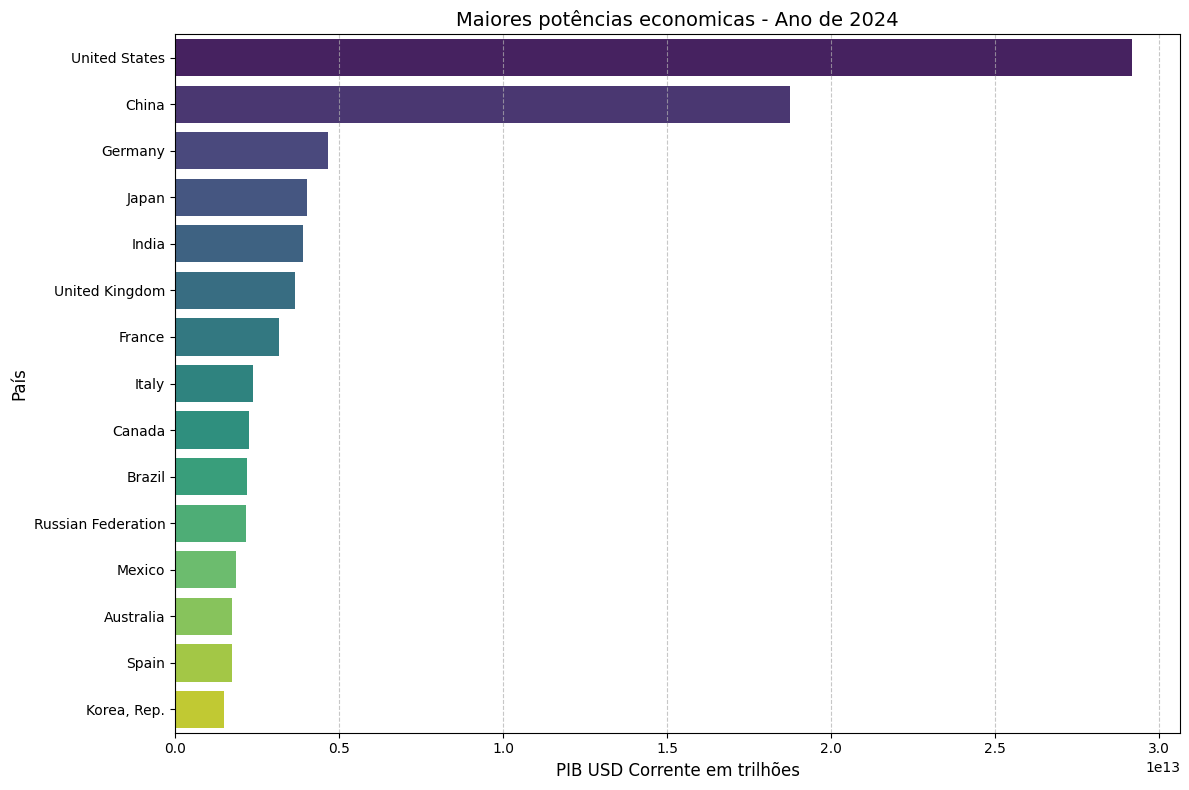

In [153]:
# Maiores economias mundiais

plt.figure(figsize=(12, 8))
sns.barplot(maioresEconomiasPaises, y='pais', x='pib_usd_corrente', palette='viridis')

# Personalizar o gráfico
plt.title('Maiores potências economicas - Ano de 2024', fontsize=14)
plt.xlabel('PIB USD Corrente em trilhões', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Os 15 países com as maiores inflações no ano de 2024

In [154]:
# Filtrando o ano de 2024 e descartando países sem dado de inflação
df_infla2024 = df_economiaPaises[(df_economiaPaises["ano"] == 2024) & (df_economiaPaises["inflacao_anual"].notna())]

# Ordenando do maior para o menor e pegando só os 15 primeiros
maioresInflacoesPaises = (
    df_2024[["pais", "inflacao_anual"]]
    .sort_values(by="inflacao_anual", ascending=False)
    .head(15)
    .reset_index(drop=True)
)

maioresInflacoesPaises


,pais,inflacao_anual
0,"Venezuela, RB",72.74125
1,Turkiye,58.51000
2,Lebanon,45.24000
3,Nigeria,33.24000
4,"Iran, Islamic Rep.",32.46000
5,Malawi,32.18000
6,Sierra Leone,28.63000
7,"Egypt, Arab Rep.",28.27000
8,Angola,28.24000
9,Haiti,26.95000


/tmp/ipython-input-155-1760426337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maioresInflacoesPaises, y="pais", x="inflacao_anual", palette="Reds_r")


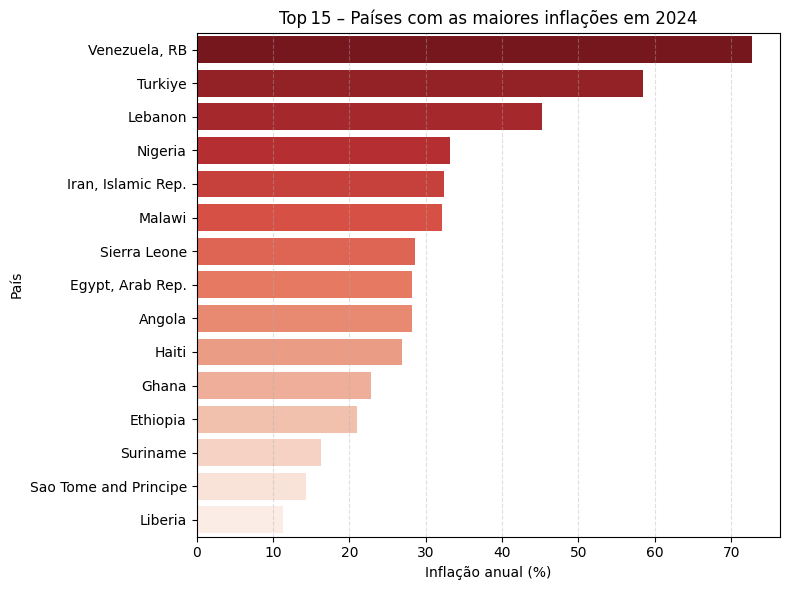

In [155]:
# Gráfico de barras para ver os países com maiores inflações de 2024
plt.figure(figsize=(8,6))
sns.barplot(data=maioresInflacoesPaises, y="pais", x="inflacao_anual", palette="Reds_r")
plt.title("Top 15 – Países com as maiores inflações em 2024")
plt.xlabel("Inflação anual (%)")
plt.ylabel("País")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

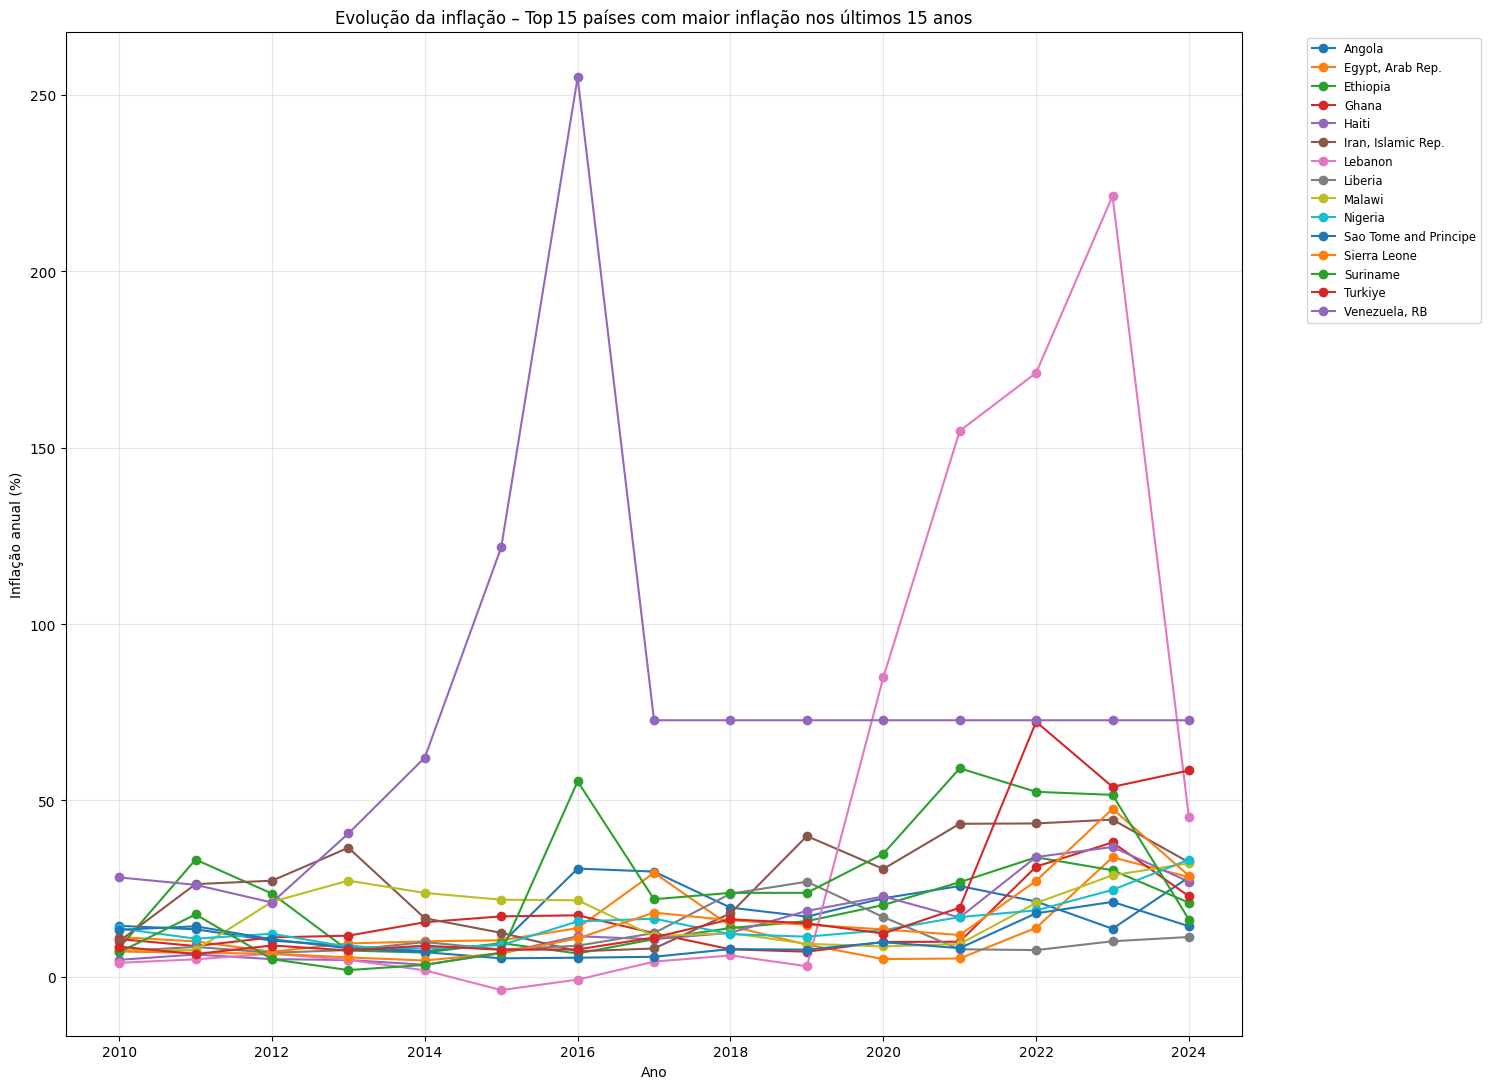

In [167]:
# Lista dos países com maior inflação
top20MaioresInfla = maioresInflacoesPaises["pais"].tolist()

# Selecionar dados dos últimos 15 anos (2010‑2024) só desses países
df_infla_15Anos = df_economiaPaises[
    (df_economiaPaises["pais"].isin(top20MaioresInfla)) &
    (df_economiaPaises["ano"].between(2010, 2024))
]

# Gráfico de linhas múltiplas
plt.figure(figsize=(15,11))
for pais, sub in df_infla_15Anos.groupby("pais"):
    plt.plot(sub["ano"], sub["inflacao_anual"], marker="o", label=pais)

plt.title("Evolução da inflação – Top 15 países com maior inflação nos últimos 15 anos")
plt.xlabel("Ano")
plt.ylabel("Inflação anual (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### Paises com as menores inflações

In [157]:
# Ordenando do menor para o maior e pegando só os 15 primeiros
menoresInfla_2024 = (
    df_2024[["pais", "inflacao_anual"]]
    .sort_values(by="inflacao_anual", ascending=True)
    .head(15)
    .reset_index(drop=True)
)

menoresInfla_2024

,pais,inflacao_anual
0,Afghanistan,-6.600000
1,Barbados,-0.460000
2,Costa Rica,-0.410000
3,China,0.220000
4,"Bahamas, The",0.410000
5,Cayman Islands,0.464286
6,Tuvalu,0.500000
7,Trinidad and Tobago,0.530000
8,Papua New Guinea,0.600000
9,Panama,0.690000


/tmp/ipython-input-158-99718208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=menoresInfla_2024, y="pais", x="inflacao_anual", palette="Blues")


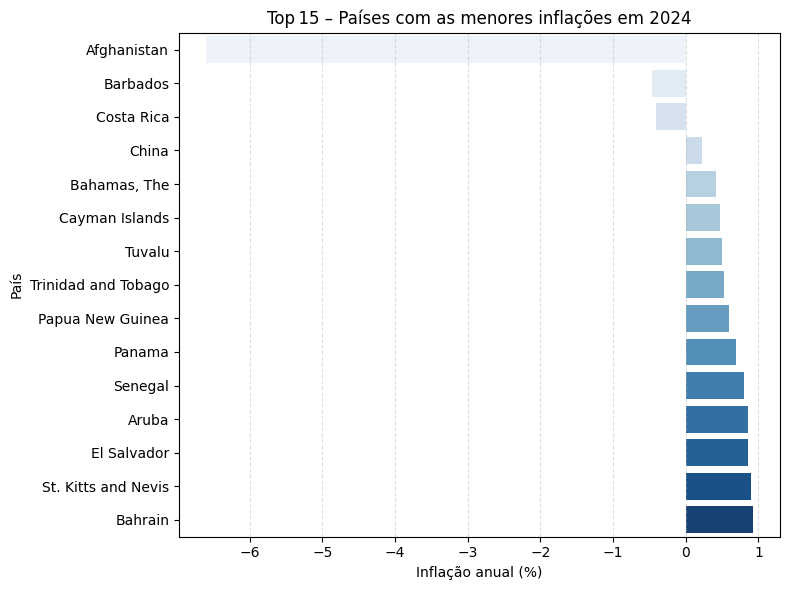

In [158]:
# Gráfico de barras para ver os países com maiores inflações de 2024
plt.figure(figsize=(8,6))
sns.barplot(data=menoresInfla_2024, y="pais", x="inflacao_anual", palette="Blues")
plt.title("Top 15 – Países com as menores inflações em 2024")
plt.xlabel("Inflação anual (%)")
plt.ylabel("País")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### Top 15 países com as maiores receitas médias individuais de 2024


In [159]:
# Filtrar ano de 2024 e tirar países sem renda bruta per capita
df_renda_2024 = df_economiaPaises[(df_economiaPaises["ano"] == 2024) & (df_economiaPaises["renda_bruta_per_capita_usd"].notna())]

# Ordenar do maior para o menor
maioresRendasPaises = (
    df_renda_2024[["pais", "renda_bruta_per_capita_usd"]]
    .sort_values(by="renda_bruta_per_capita_usd", ascending=False)
    .head(15)
    .reset_index(drop=True)
)

maioresRendasPaises


,pais,renda_bruta_per_capita_usd
0,Bermuda,140280.000000
1,Norway,98280.000000
2,Switzerland,95900.000000
3,Luxembourg,91470.000000
4,United States,83660.000000
5,Isle of Man,78211.428571
6,Ireland,77920.000000
7,Qatar,76720.000000
8,Singapore,74750.000000
9,Denmark,73790.000000


/tmp/ipython-input-160-1222885829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maioresRendasPaises, y="pais", x="renda_bruta_per_capita_usd", palette="Greens_r")


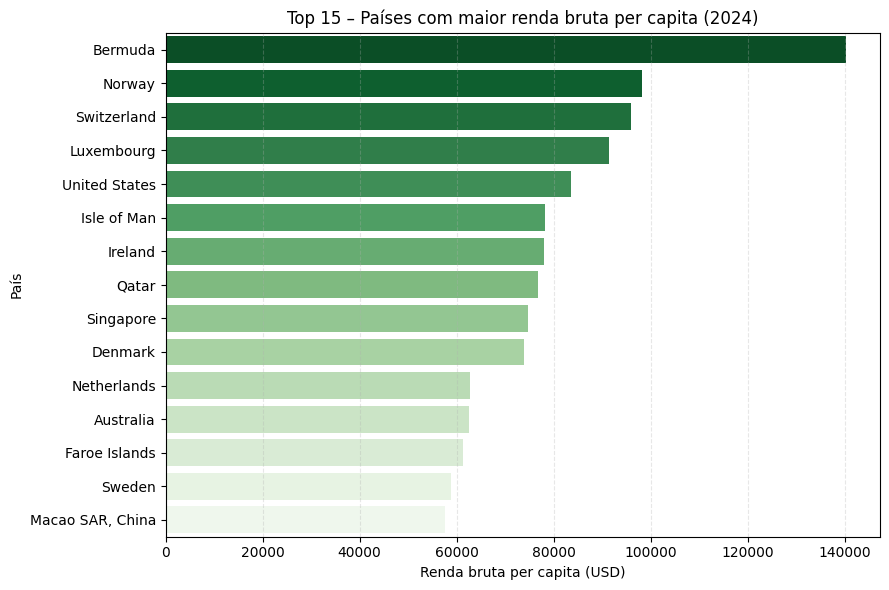

In [160]:
plt.figure(figsize=(9,6))
sns.barplot(data=maioresRendasPaises, y="pais", x="renda_bruta_per_capita_usd", palette="Greens_r")
plt.title("Top 15 – Países com maior renda bruta per capita (2024)")
plt.xlabel("Renda bruta per capita (USD)")
plt.ylabel("País")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


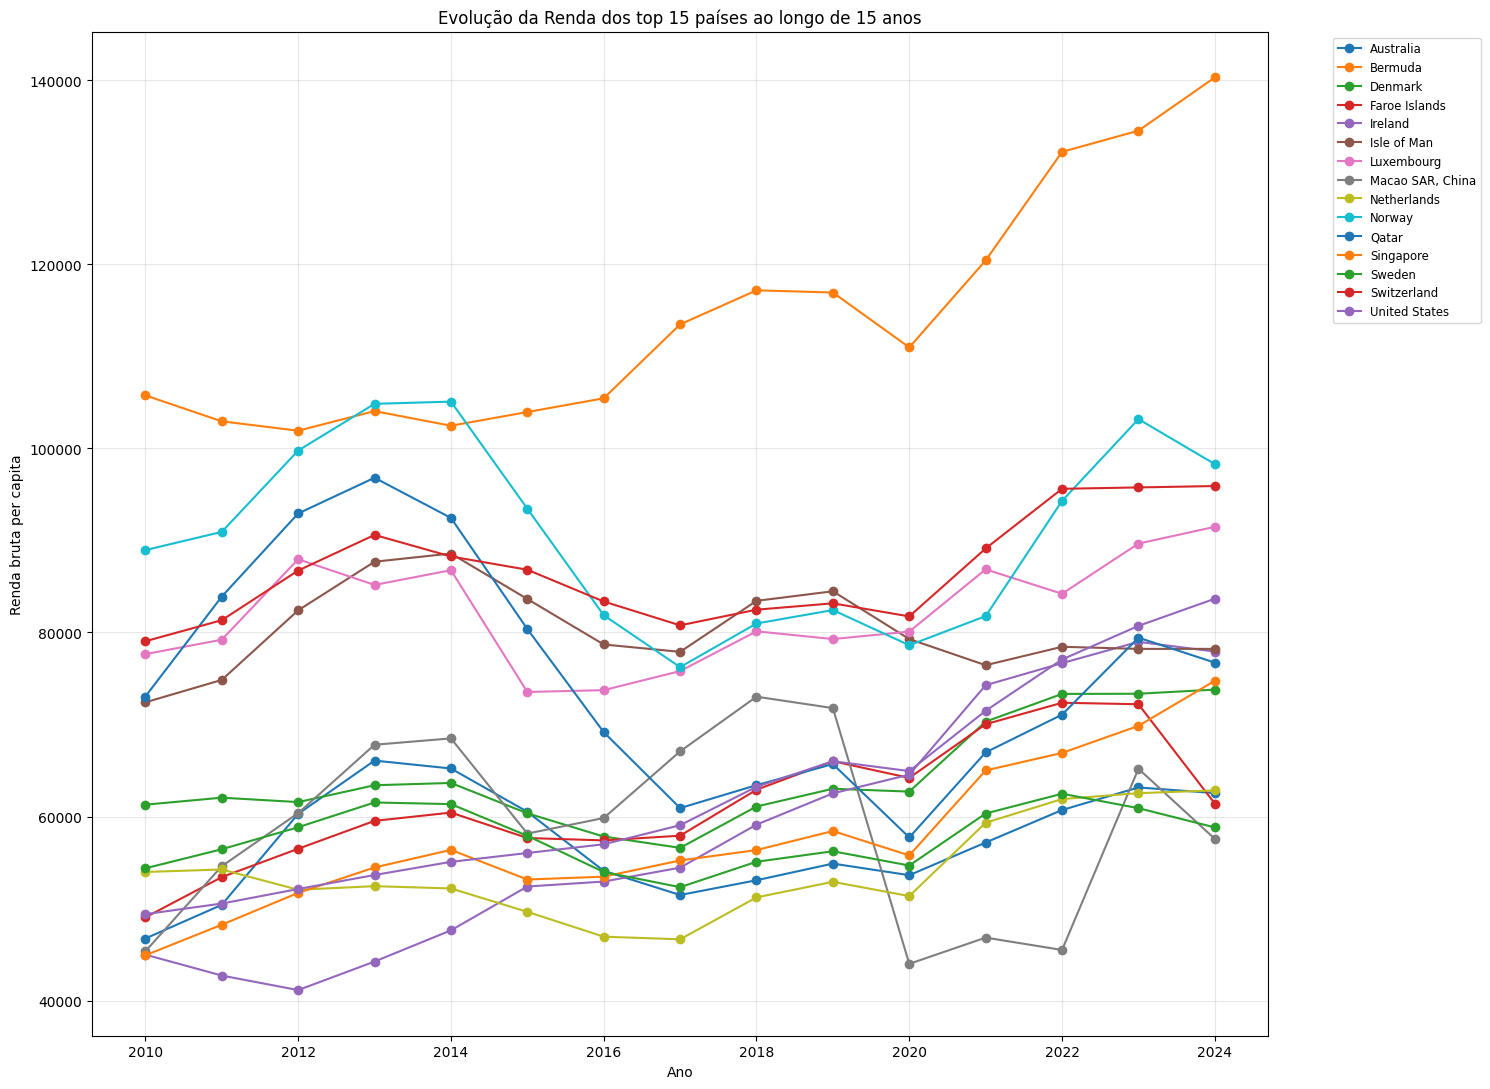

In [166]:
# Lista dos países com maior inflação
rendasPaises = maioresRendasPaises["pais"].tolist()

# Selecionar dados dos últimos 15 anos (2010‑2024) só desses países
df_renda_15Anos = df_economiaPaises[
    (df_economiaPaises["pais"].isin(rendasPaises)) &
    (df_economiaPaises["ano"].between(2010, 2024))
]

# Gráfico de linhas múltiplas
plt.figure(figsize=(15,11))
for pais, sub in df_renda_15Anos.groupby("pais"):
    plt.plot(sub["ano"], sub["renda_bruta_per_capita_usd"], marker="o", label=pais)

plt.title("Evolução da Renda dos top 15 países ao longo de 15 anos")
plt.xlabel("Ano")
plt.ylabel("Renda bruta per capita")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Os 15 paises com maiores crescimentos econômicos

In [168]:
# Filtrar apenas o ano de 2024
df_cresc_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024]

# Selecionar os 15 países com maior crescimento econômico
maioresCrescimentoPaises = df_cresc_2024.sort_values(by='crescimento_pib_anual', ascending=False).head(15).reset_index(drop=True)

# Visualizar o resultado
maioresCrescimentoPaises[['pais', 'crescimento_pib_anual']]



,pais,crescimento_pib_anual
0,Guyana,43.37
1,Samoa,9.42
2,Kyrgyz Republic,9.04
3,"Macao SAR, China",8.81
4,Niger,8.42
5,Tajikistan,8.40
6,Belize,8.15
7,Benin,7.45
8,Ethiopia,7.32
9,Cabo Verde,7.27


/tmp/ipython-input-169-2288843914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=maioresCrescimentoPaises, y="pais", x="crescimento_pib_anual", palette="Greens_r")


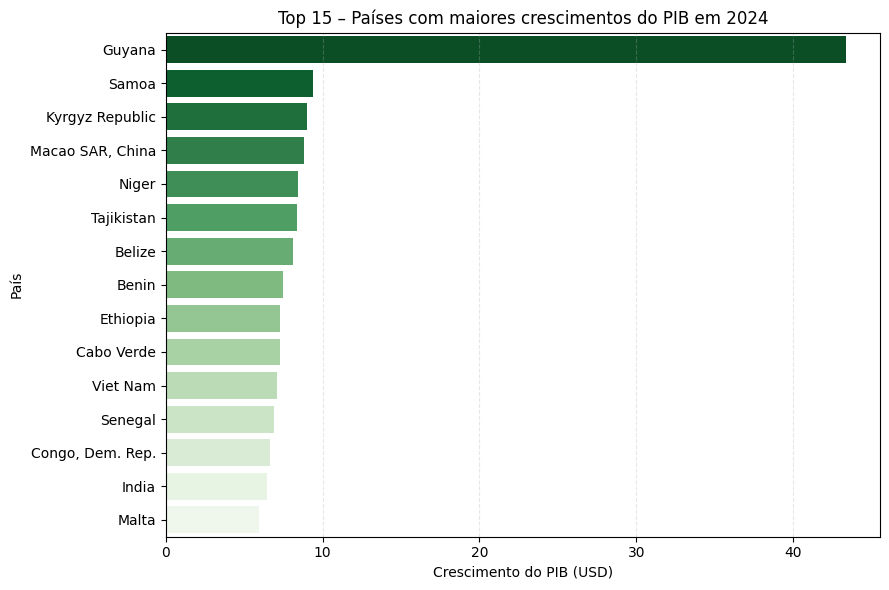

In [169]:
plt.figure(figsize=(9,6))
sns.barplot(data=maioresCrescimentoPaises, y="pais", x="crescimento_pib_anual", palette="Greens_r")
plt.title("Top 15 – Países com maiores crescimentos do PIB em 2024")
plt.xlabel("Crescimento do PIB (USD)")
plt.ylabel("País")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


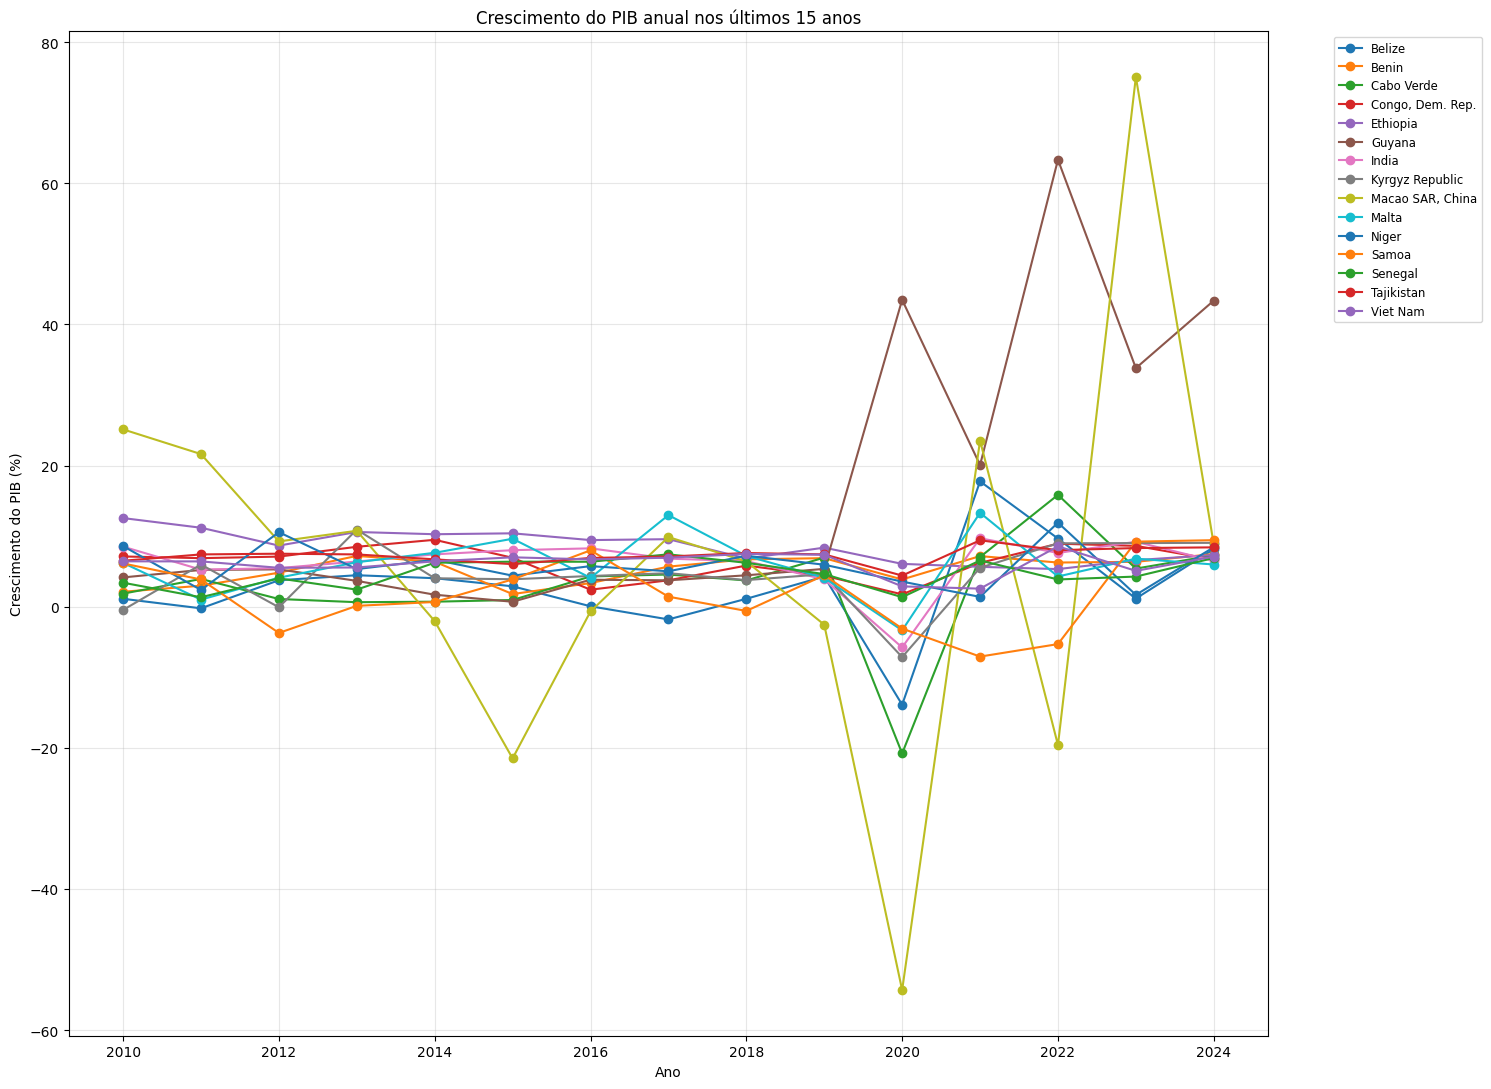

In [171]:
# Lista dos países com maior inflação
crescimentoPaises = maioresCrescimentoPaises["pais"].tolist()

# Selecionar dados dos últimos 15 anos (2010‑2024) só desses países
df_cresc_15Anos = df_economiaPaises[
    (df_economiaPaises["pais"].isin(crescimentoPaises)) &
    (df_economiaPaises["ano"].between(2010, 2024))
]

# Gráfico de linhas múltiplas
plt.figure(figsize=(15,11))
for pais, sub in df_cresc_15Anos.groupby("pais"):
    plt.plot(sub["ano"], sub["crescimento_pib_anual"], marker="o", label=pais)

plt.title("Crescimento do PIB anual nos últimos 15 anos")
plt.xlabel("Ano")
plt.ylabel("Crescimento do PIB (%)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", fontsize="small")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Os 15 países com as melhores e piores taxas de câmbio

In [176]:
# Filtrar apenas o ano de 2024
df_cambio_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024].dropna(subset=['taxa_cambio_local_usd'])

# Selecionar os 15 países com maior crescimento econômico
melhoresTaxaCambioPaises = df_cambio_2024[['pais', 'taxa_cambio_local_usd']].sort_values(by='taxa_cambio_local_usd', ascending=True).head(15).reset_index(drop=True)

# Visualizar o resultado
melhoresTaxaCambioPaises[['pais', 'taxa_cambio_local_usd']]



,pais,taxa_cambio_local_usd
0,Kuwait,0.31
1,Bahrain,0.38
2,Oman,0.38
3,Jordan,0.71
4,Isle of Man,0.78
5,Gibraltar,0.78
6,United Kingdom,0.78
7,Cayman Islands,0.83
8,Switzerland,0.88
9,Finland,0.92


/tmp/ipython-input-186-1327216308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


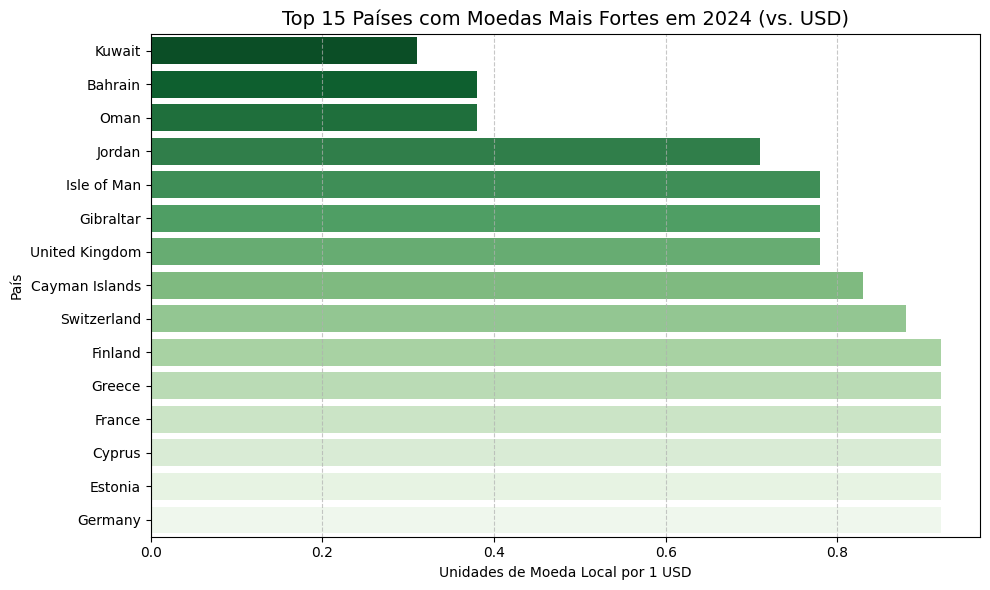

In [186]:
# Filtrar 2024 e remover valores nulos de taxa de câmbio
df_cambio_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024].dropna(subset=['taxa_cambio_local_usd'])

# Ordenar do menor para o maior (moedas mais fortes primeiro)
top15_cambio = df_cambio_2024.sort_values(by='taxa_cambio_local_usd').head(15)

# Gráfico horizontal
plt.figure(figsize=(10,6))
sns.barplot(
    data=top15_cambio,
    x='taxa_cambio_local_usd',
    y='pais',
    palette='Greens_r'
)
plt.title('Top 15 Países com Moedas Mais Fortes em 2024 (vs. USD)', fontsize=14)
plt.xlabel('Unidades de Moeda Local por 1 USD')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Paises com as piores taxas de câmbio

In [179]:
# Filtrar apenas o ano de 2024
df_cambio_2024 = df_economiaPaises[df_economiaPaises['ano'] == 2024].dropna(subset=['taxa_cambio_local_usd'])

# Selecionar os 15 países com maiores taxas de cambio
melhoresTaxaCambioPaises = df_cambio_2024[['pais', 'taxa_cambio_local_usd']].sort_values(by='taxa_cambio_local_usd', ascending=False).head(15).reset_index(drop=True)

# Visualizar o resultado
melhoresTaxaCambioPaises[['pais', 'taxa_cambio_local_usd']]



,pais,taxa_cambio_local_usd
0,Lebanon,89500.000000
1,"Iran, Islamic Rep.",28752.228000
2,Viet Nam,24164.890000
3,Indonesia,15855.450000
4,Paraguay,7560.250000
5,Colombia,4074.430000
6,Tanzania,2597.900000
7,Nigeria,1478.970000
8,"Korea, Rep.",1363.380000
9,"Congo, Dem. Rep.",1350.532667


/tmp/ipython-input-181-158045103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


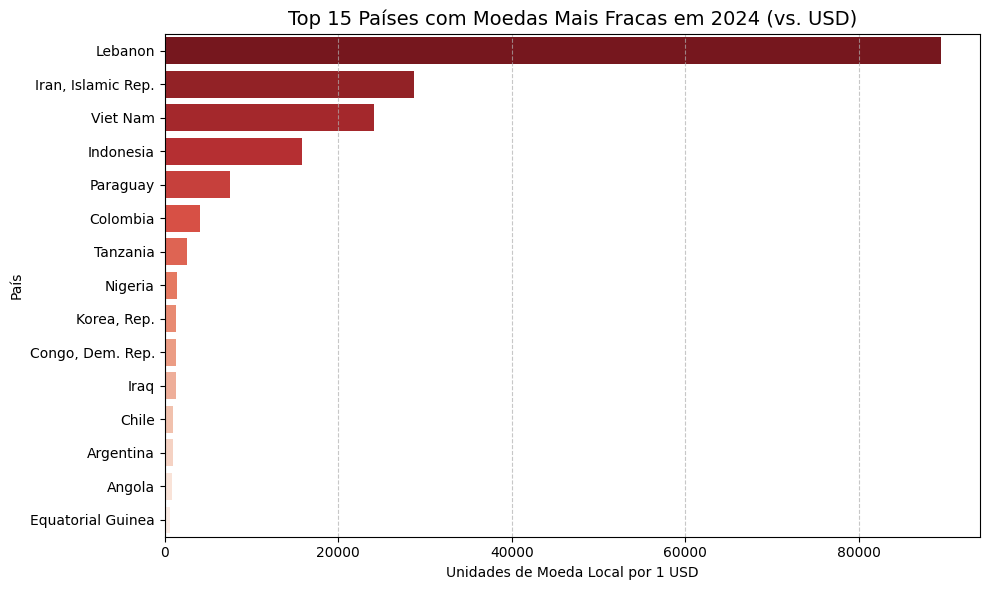

In [181]:
# Ordenar (moedas mais fracas primeiro)
top15_cambio = df_cambio_2024.sort_values(by='taxa_cambio_local_usd').head(15)

# Gráfico horizontal
plt.figure(figsize=(10,6))
sns.barplot(
    data=melhoresTaxaCambioPaises,
    x='taxa_cambio_local_usd',
    y='pais',
    palette='Reds_r'
)
plt.title('Top 15 Países com Moedas Mais Fracas em 2024 (vs. USD)', fontsize=14)
plt.xlabel('Unidades de Moeda Local por 1 USD')
plt.ylabel('País')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
